In [3]:
%matplotlib inline

# Getting a Video Stream


You can read a vidoe frame by frame from a file or from a camera connected to your computer. To do so, you have to instantiate `cv2.VideoCapture`. In case you give it a path to a movie file it reads frames from a file. Otherwise, if you pass an integer it grabs frames from the camera with the corresponding images.

Grab frames from a file and scale the frames down.

```python
import cv2


cap = cv2.VideoCapture('/path/to/a/movie/file')  

w, h = (640, 400)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
```

Grab frames from the first camera connected to your computer.

```python
import cv2


cap = cv2.VideoCapture(0)
```    





# Filtering/Smoothing an Image


The following examples and descriptions are adapted from
http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which does not blur the edges too). OpenCV provides mainly four types of blurring techniques.

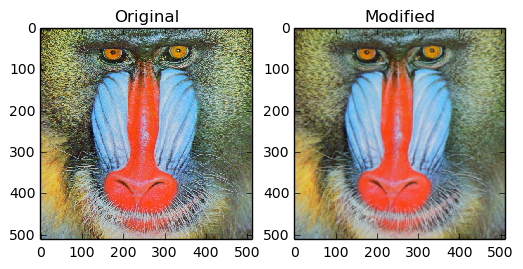

In [103]:
import os
import webget


url = 'http://graphics.cs.williams.edu/data/images/mandrill.png'
webget.download(url)

img = cv2.imread(os.path.basename(url))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none')  # , cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(blur, interpolation='none')  #, cmap=plt.cm.Greys_r)
plt.show()

In [104]:
kernel_x = cv2.getGaussianKernel(5, 0)
print(kernel_x * kernel_x.T)

[[ 0.00390625  0.015625    0.0234375   0.015625    0.00390625]
 [ 0.015625    0.0625      0.09375     0.0625      0.015625  ]
 [ 0.0234375   0.09375     0.140625    0.09375     0.0234375 ]
 [ 0.015625    0.0625      0.09375     0.0625      0.015625  ]
 [ 0.00390625  0.015625    0.0234375   0.015625    0.00390625]]


# Thresholds and Binary Images

The following examples and descriptions are adapted from
http://docs.opencv.org/3.1.0/d7/d4d/tutorial_py_thresholding.html

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is `cv2.threshold`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the `maxVal` which represents the value to be given if pixel value is more than the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function.

[[143 143 142 ...,  49  49  48]
 [155 154 153 ...,  49  49  49]
 [156 155 154 ...,  49  49  49]
 ..., 
 [254 254 254 ..., 252 251 251]
 [254 254 254 ..., 252 251 251]
 [254 254 254 ..., 252 251 251]]


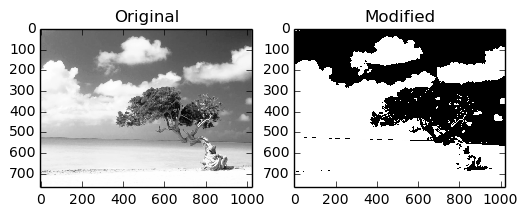

In [79]:
import cv2
import webget
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./mare-08.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img)
img = cv2.medianBlur(img, 5)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(thresh, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

## Morphological Operations

The following examples and descriptions are adapted from
http://docs.opencv.org/3.1.0/d9/d61/tutorial_py_morphological_ops.html

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.

### Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object. So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here is an example of a 5x5 kernel with full of ones and a 3x3 kernel with *cross*.

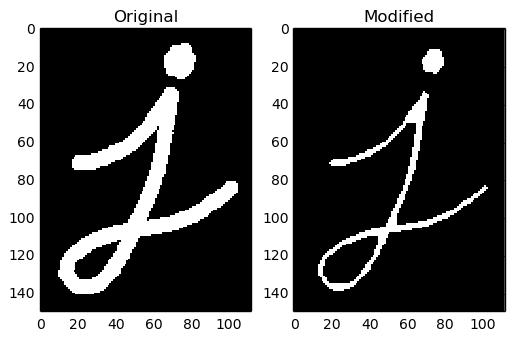

In [70]:
import cv2
import webget
import numpy as np
import matplotlib.pyplot as plt


webget.download('http://docs.opencv.org/3.1.0/j.png')

img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)

erosion = cv2.erode(img, kernel, iterations=1)


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(erosion, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

### Dilation

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

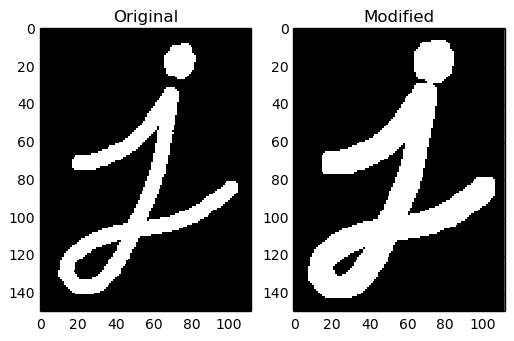

In [71]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)

dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(dilation, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

###  Opening

Opening is just another name of *erosion* followed by *dilation*. It is useful in removing noise, as we explained above. Here we use the function, `cv2.morphologyEx()`.

Let's start by generating a bit of noise to distort our image.

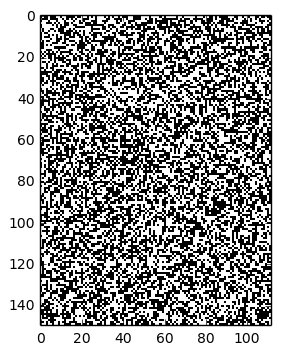

In [43]:
noise = np.random.randint(2, size=112*150)
noise = noise.reshape(150,112).astype(np.uint8)
plt.imshow(noise, cmap=plt.cm.Greys, interpolation='none')

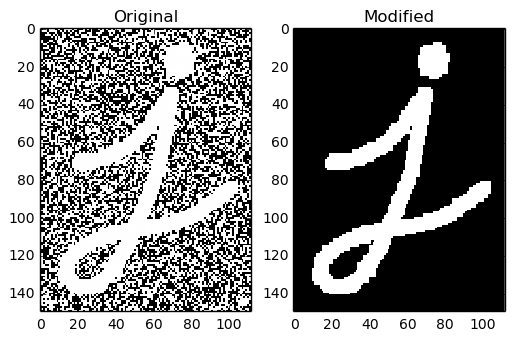

In [72]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)
img = img - noise
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

erosion = cv2.erode(img, kernel, iterations=1)
opening_stepwise = cv2.dilate(erosion, kernel, iterations=1)
assert np.array_equal(opening, opening_stepwise)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(opening, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

### Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

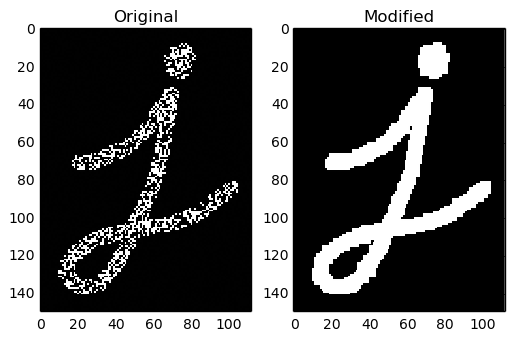

In [73]:
img = cv2.imread('j.png', 0)
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], np.uint8)
img = img + noise
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

dilation = cv2.dilate(img, kernel, iterations=1)
closing_stepwise = cv2.erode(dilation, kernel, iterations=1)
assert np.array_equal(closing, closing_stepwise)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, interpolation='none', cmap=plt.cm.Greys_r)
plt.subplot(1, 2, 0)
plt.title('Modified')
plt.imshow(opening, interpolation='none', cmap=plt.cm.Greys_r)
plt.show()

# An Example

There is a citizen science project *Chimp&See* (https://www.chimpandsee.org/) from the Max Planck Institute for Evolutionary Anthropology, which asks for help on identifying different animals moving through the djungle.
https://www.chimpandsee.org/


Let's see how we can try to help them with a naive implementation of movement detection and tracking, see program `movement_detection.py`.


![](./movement.gif)
![](./movement_fd.gif)
![](./movement_thresh.gif)


This program is inspired by and adapted from 
http://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/